In [2]:
import pandas as pd

# read data
reviews_df = pd.read_csv("Keru_reviews.csv")

reviews_df.head()

/home/hp/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,label,text
0,5,Looks ok. Not like so durable. Will hv to use ...
1,5,"Tried, the current can be very powerful depend..."
2,5,Item received after a week. Looks smaller than...
3,5,Thanks!!! Works as describe no complaints. Not...
4,5,Fast delivery considering it’s from overseas a...


In [3]:
reviews_df1 = reviews_df[:1000]

In [4]:
reviews_df1.shape

(1000, 2)

In [5]:
reviews_df1

,label,text
0,5,Looks ok. Not like so durable. Will hv to use ...
1,5,"Tried, the current can be very powerful depend..."
2,5,Item received after a week. Looks smaller than...
3,5,Thanks!!! Works as describe no complaints. Not...
4,5,Fast delivery considering it’s from overseas a...
...,...,...
995,5,Received in GD condition 👍
996,5,padding is quite thin but material is soft and...
997,4,Quality is good.. its fit well!
998,5,Good material


In [6]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df1["review_clean"] = reviews_df1["text"].apply(lambda x: clean_text(x))

/home/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
reviews_df1

,label,text,review_clean
0,5,Looks ok. Not like so durable. Will hv to use ...,look ok like durable hv use recommend others w...
1,5,"Tried, the current can be very powerful depend...",tried current powerful depend setting dare go ...
2,5,Item received after a week. Looks smaller than...,item receive week look small expect can’t wait...
3,5,Thanks!!! Works as describe no complaints. Not...,thanks work describe complaint really expect l...
4,5,Fast delivery considering it’s from overseas a...,fast delivery consider it’s overseas tried sur...
...,...,...,...
995,5,Received in GD condition 👍,receive gd condition
996,5,padding is quite thin but material is soft and...,pad quite thin material soft comfy would bette...
997,4,Quality is good.. its fit well!,quality good fit well
998,5,Good material,good material


In [9]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df1["sentiments"] = reviews_df1["text"].apply(lambda x: sid.polarity_scores(x))


/home/hp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
reviews_df1 = pd.concat([reviews_df1.drop(['sentiments'], axis=1), reviews_df1['sentiments'].apply(pd.Series)], axis=1)

In [12]:
# add number of characters column
reviews_df1["nb_chars"] = reviews_df1["text"].apply(lambda x: len(x))

# add number of words column
reviews_df1["nb_words"] = reviews_df1["text"].apply(lambda x: len(x.split(" ")))

In [13]:
reviews_df1

,label,text,review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,5,Looks ok. Not like so durable. Will hv to use ...,look ok like durable hv use recommend others w...,0.097,0.599,0.304,0.5408,87,18
1,5,"Tried, the current can be very powerful depend...",tried current powerful depend setting dare go ...,0.090,0.772,0.138,0.1893,168,32
2,5,Item received after a week. Looks smaller than...,item receive week look small expect can’t wait...,0.000,1.000,0.000,0.0000,75,13
3,5,Thanks!!! Works as describe no complaints. Not...,thanks work describe complaint really expect l...,0.161,0.514,0.325,0.6724,101,15
4,5,Fast delivery considering it’s from overseas a...,fast delivery consider it’s overseas tried sur...,0.116,0.884,0.000,-0.2411,97,16
...,...,...,...,...,...,...,...,...,...
995,5,Received in GD condition 👍,receive gd condition,0.000,1.000,0.000,0.0000,26,5
996,5,padding is quite thin but material is soft and...,pad quite thin material soft comfy would bette...,0.000,0.796,0.204,0.5927,83,17
997,4,Quality is good.. its fit well!,quality good fit well,0.000,0.450,0.550,0.5983,32,7
998,5,Good material,good material,0.000,0.256,0.744,0.4404,13,2


In [15]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df1["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df1.index
reviews_df1 = pd.concat([reviews_df1, tfidf_df], axis=1)

In [16]:
reviews_df1

,label,text,review_clean,neg,neu,pos,compound,nb_chars,nb_words,word_also,...,word_wait,word_wear,word_week,word_well,word_within,word_work,word_workout,word_worth,word_would,word_yet
0,5,Looks ok. Not like so durable. Will hv to use ...,look ok like durable hv use recommend others w...,0.097,0.599,0.304,0.5408,87,18,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.430952,0.000000,0.000000
1,5,"Tried, the current can be very powerful depend...",tried current powerful depend setting dare go ...,0.090,0.772,0.138,0.1893,168,32,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,5,Item received after a week. Looks smaller than...,item receive week look small expect can’t wait...,0.000,1.000,0.000,0.0000,75,13,0.0,...,0.401691,0.0,0.374181,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,5,Thanks!!! Works as describe no complaints. Not...,thanks work describe complaint really expect l...,0.161,0.514,0.325,0.6724,101,15,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.310066,0.0,0.000000,0.000000,0.000000
4,5,Fast delivery considering it’s from overseas a...,fast delivery consider it’s overseas tried sur...,0.116,0.884,0.000,-0.2411,97,16,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.356459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,Received in GD condition 👍,receive gd condition,0.000,1.000,0.000,0.0000,26,5,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
996,5,padding is quite thin but material is soft and...,pad quite thin material soft comfy would bette...,0.000,0.796,0.204,0.5927,83,17,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.401228,0.000000
997,4,Quality is good.. its fit well!,quality good fit well,0.000,0.450,0.550,0.5983,32,7,0.0,...,0.000000,0.0,0.000000,0.50473,0.0,0.000000,0.0,0.000000,0.000000,0.000000
998,5,Good material,good material,0.000,0.256,0.744,0.4404,13,2,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


# Exploratory data analysis

In [18]:
# show is_pos itive review distribution
reviews_df1["pos"].value_counts(normalize = True)

0.000    0.139
0.492    0.019
1.000    0.015
0.744    0.013
0.420    0.012
         ...  
0.785    0.001
0.359    0.001
0.201    0.001
0.382    0.001
0.166    0.001
Name: pos, Length: 425, dtype: float64

In [22]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df1[reviews_df1["nb_words"] >= 5].sort_values("pos", ascending = False)[["text", "pos"]].head(10)

,text,pos
516,Fit well. Good quality 👌,0.882
977,"Sexy bra, so nice 🥰",0.765
250,"Pretty good, easy to use. Hope it will be effe...",0.749
230,Satisfied with purchase :),0.744
67,Strength is good with 4 mode. Excellent product!,0.716
984,Good condition. Happy with it,0.688
596,Size fit well and comfortable. Received in goo...,0.684
669,Great and value for money.,0.684
912,Item in good condition and good fit,0.675
557,Haven’t try but good material hopefully can fi...,0.672


In [40]:
reviews_df1[reviews_df1["nb_words"] >= 5].sort_values("neu", ascending = False)[["text", "pos"]].head(10)

,text,pos
898,😊 2nd time order,0.0
59,The delivery was fast... I have not try but Q...,0.0
716,Just received the items 👍🏻,0.0
718,Order 3 with S/M size and one L size but recei...,0.0
934,Looks about right yet to try yet. Fast shippin...,0.0
348,Seller reply my enquiries promptly. Delivered ...,0.0
203,Received item earlier than given date. Tried t...,0.0
820,"Even though now is circuit breaker conditions,...",0.0
355,oh was expecting it to be slightly smaller in ...,0.0
364,"Still prefers the normal grid one, this feels ...",0.0


In [25]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df1[reviews_df1["nb_words"] >= 5].sort_values("neg", ascending = False)[["text", "pos"]].head(10)

,text,pos
65,I just got a electric shock with this thing! W...,0.000
29,"No bad, cheap & good. Recomended.",0.274
84,Box damage when received,0.000
64,Items as describe but not sure how effective,0.000
374,Received! THANKS👍🏻👍🏻👍🏻👍🏻 i don’t regret! 👍🏻👍🏻👍...,0.000
522,Received wrong size and colour.,0.000
496,No pain while riding. Just abit tight in the g...,0.000
331,Pdt feels sandy/ dirty after unwrapping,0.000
100,Love the Low back cutting.,0.429
485,"comfy material, stretchable, but padding abit ...",0.000


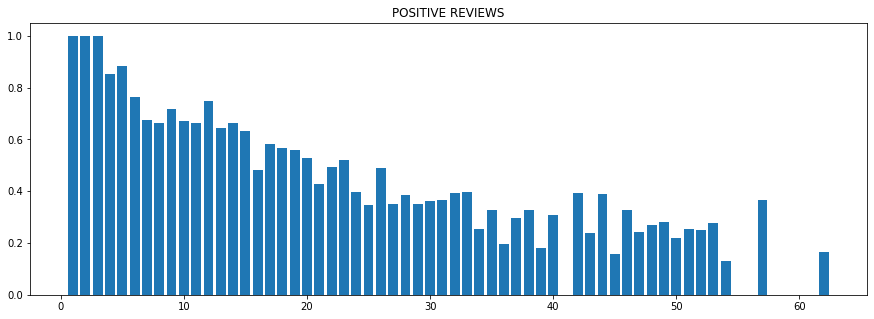

In [29]:
#ploting the  positive reviews
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.bar(reviews_df1["nb_words"],reviews_df1["pos"])
plt.title('POSITIVE REVIEWS')
plt.show()

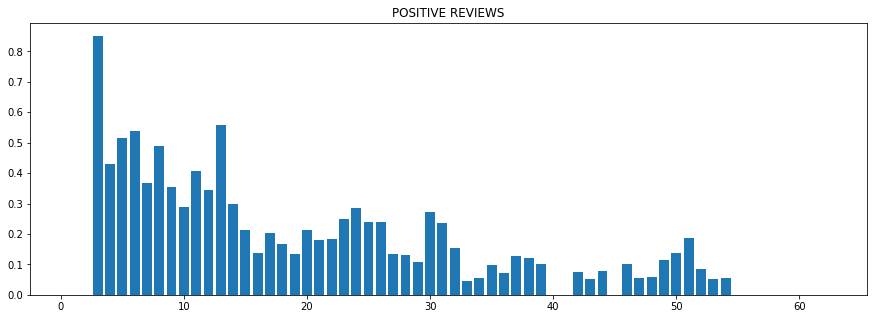

In [30]:
#ploting the  positive reviews
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.bar(reviews_df1["nb_words"],reviews_df1["neg"])
plt.title('POSITIVE REVIEWS')
plt.show()

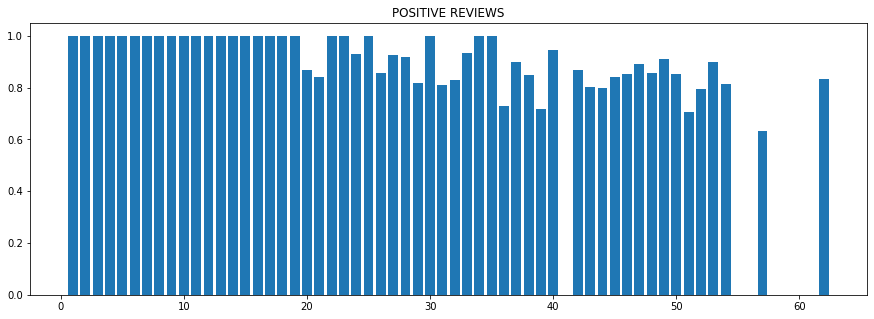

In [31]:
#ploting the  positive reviews
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.bar(reviews_df1["nb_words"],reviews_df1["neu"])
plt.title('POSITIVE REVIEWS')
plt.show()

In [59]:
del1 =sum(reviews_df1["neu"])

In [60]:
del2=sum(reviews_df1["pos"])

In [61]:
del3=(reviews_df1["neg"])

In [68]:
darts=[del1,del2,del2]
darts

[641.2629999999992, 329.69300000000015, 329.69300000000015]

In [82]:
sentiment = ['Neutral','Positive','Negative']

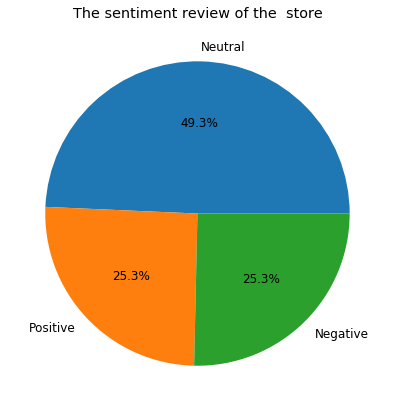

In [94]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(darts, labels = sentiment,autopct="%1.1f%%")
plt.title('The sentiment review of the  store')
plt.savefig("Sentiment  result of the online review")
# show plot
plt.show()
